In [1]:
import numpy as np

def helper(X, initial_centroids):
    # Initialize centroids
    centroids = np.array(initial_centroids)
    for iteration in range(100): # Max Iterations
        # Assignment step
        distances = np.linalg.norm(X[:, np.newaxis] - centroids, axis=2)
        cluster_assignments = np.argmin(distances, axis=1)

        # Update step
        new_centroids = np.array([X[cluster_assignments == i].mean(axis=0) if len(X[cluster_assignments == i]) > 0 else centroids[i] 
                                  for i in range(len(centroids))])

        # Check for convergence
        shifts = np.linalg.norm(new_centroids - centroids, axis=1)
        if np.all(shifts < 1e-4):   # Convergence Threshold
            print(f'Converged after {iteration + 1} iterations.')
            break
        centroids = new_centroids

    # Create final clusters
    clusters = {i: X[cluster_assignments == i] for i in range(len(centroids))}
    return centroids, clusters

# (a) Initialization: Using the given centroids as starting points.
initial_centroids = [np.array([3.0, 3.0]), np.array([2.0, 2.0])]

# Given data points
X = np.array([[5.1, 3.5],[4.9, 3.0],[5.8, 2.7],[6.0, 3.0],[6.7, 3.1],[4.5, 2.3],[6.1, 2.8],[5.2, 3.2],[5.5, 2.6],[5.0, 2.0],[8.0, 0.5],[7.5, 0.8],[8.1, -0.1],[2.5, 3.5],[1.0, 3.0],[4.5, -1.0],[3.0, -0.5],[5.1, -0.2],[6.0, -1.5],[3.5, -0.1],[4.0, 0.0],[6.1, 0.5],[5.4, -0.5],[5.3, 0.3],[5.8, 0.6]])

# Run K-Means clustering
final_centroids, final_clusters = helper(X, initial_centroids)

# Output the final centroids
print('\nFinal centroids after convergence:\n' + '\n'.join(f'Centroid {i+1}: {centroid}' for i, centroid in enumerate(final_centroids)))

Converged after 3 iterations.

Final centroids after convergence:
Centroid 1: [5.8   2.125]
Centroid 2: [ 4.2        -0.05555556]


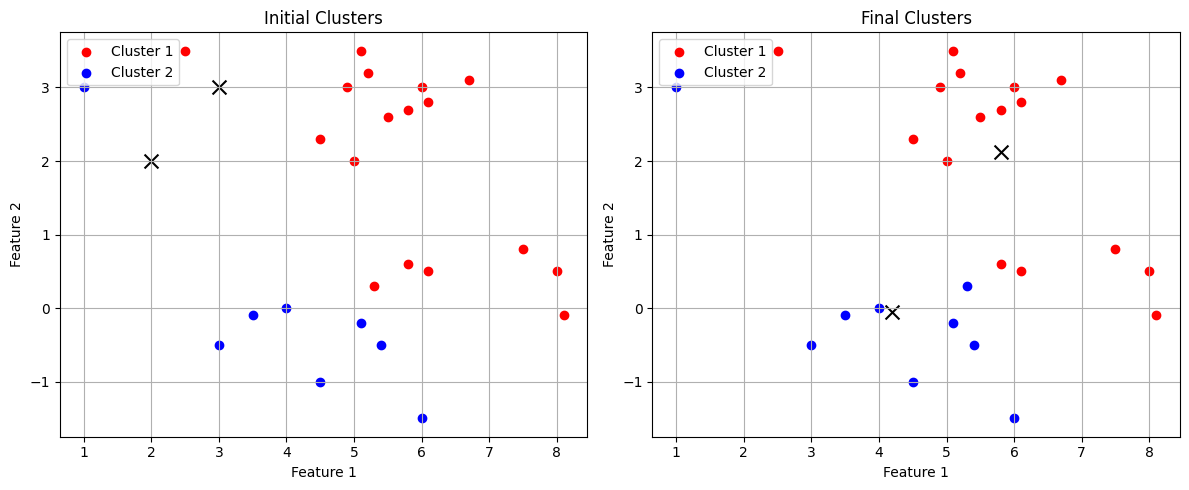

In [2]:
import matplotlib.pyplot as plt

# Store initial clusters for plotting
def initial_assignment(X, centroids):
    distances = np.linalg.norm(X[:, np.newaxis] - centroids, axis=2)  # Compute distances
    cluster_indices = np.argmin(distances, axis=1)  # Assign clusters
    return {i: X[cluster_indices == i] for i in range(len(centroids))}

# Get initial clusters based on the initial centroids
initial_clusters = initial_assignment(X, initial_centroids)

# Plot the initial and final clusters
def plot_clusters(clusters, centroids, title):
    colors = ['r', 'b', 'g', 'c', 'm', 'y', 'k']
    # Plot clusters
    i = 0
    cluster_keys = list(clusters.keys())
    while i < len(cluster_keys):
        cluster = clusters[cluster_keys[i]]
        if cluster.size > 0:
            plt.scatter(cluster[:, 0], cluster[:, 1], c=colors[i % len(colors)], label=f'Cluster {cluster_keys[i] + 1}')
        i += 1

    # Plot centroids
    i = 0
    while i < len(centroids):
        centroid = centroids[i]
        plt.scatter(centroid[0], centroid[1], c='k', marker='x', s=100)
        i += 1

    plt.title(title)
    plt.ylabel('Feature 2')
    plt.xlabel('Feature 1')
    plt.legend()
    plt.grid(True)


plt.figure(figsize=(12, 5))

# Initial clusters plot
plt.subplot(1, 2, 1)
plot_clusters(initial_clusters, initial_centroids, 'Initial Clusters')

# Final clusters plot
plt.subplot(1, 2, 2)
plot_clusters(final_clusters, final_centroids, 'Final Clusters')

plt.tight_layout()
plt.show()

Converged after 3 iterations.
Converged after 7 iterations.

Final centroids with provided initialization:
Centroid 1: [5.8   2.125]
Centroid 2: [ 4.2        -0.05555556]

Final centroids with random initialization:
Centroid 1: [4.85833333 2.89166667]
Centroid 2: [ 5.56153846 -0.09230769]


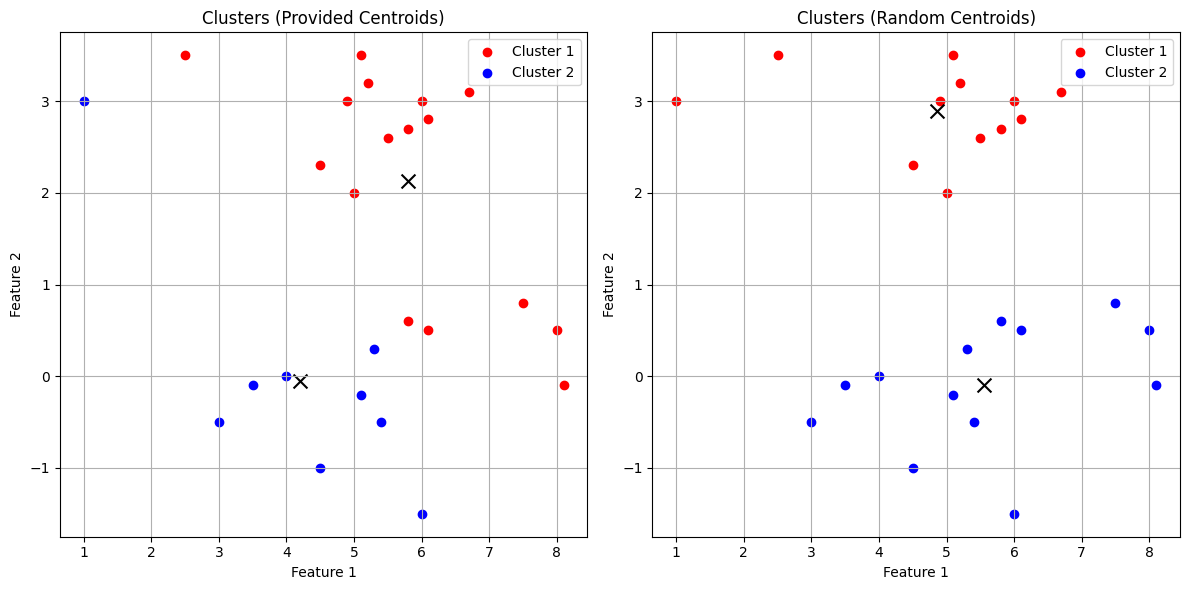

In [3]:
# Provided initial centroids
provided_centroids = np.array([[3.0, 3.0], [2.0, 2.0]])

# Random initialization of centroids using a while loop
np.random.seed(43)  # For reproducibility
selected_indices = set()
while len(selected_indices) < 2:
    selected_indices.add(np.random.randint(0, len(X)))
random_centroids = [X[idx].copy() for idx in selected_indices]

# Function to store results dynamically
results = {}

# Run KMeans with provided centroids
results["provided"] = helper(X, provided_centroids)

# Run KMeans with random centroids
results["random"] = helper(X, random_centroids)

# Output results
for init_type, (centroids, clusters) in results.items():
    print(f'\nFinal centroids with {init_type} initialization:')
    for i, centroid in enumerate(centroids, start=1):
        print(f'Centroid {i}: {centroid}')

# Plot results
plt.figure(figsize=(12, 6))

# Titles for the subplots
titles = ['Clusters (Provided Centroids)', 'Clusters (Random Centroids)']

# Loop through the results dictionary to plot
for i, (init_type, (centroids, clusters)) in enumerate(results.items(), start=1):
    plt.subplot(1, 2, i)
    plot_clusters(clusters, centroids, titles[i - 1])  # Titles correspond to the loop order

plt.tight_layout()
plt.show()

Converged after 2 iterations.
Converged after 2 iterations.
Converged after 2 iterations.
Converged after 2 iterations.
Converged after 2 iterations.
Converged after 2 iterations.
Converged after 4 iterations.
Converged after 2 iterations.
Converged after 2 iterations.
Converged after 7 iterations.
Converged after 3 iterations.
Converged after 2 iterations.
Converged after 4 iterations.
Converged after 5 iterations.
Converged after 5 iterations.
Converged after 4 iterations.
Converged after 4 iterations.
Converged after 3 iterations.
Converged after 4 iterations.
Converged after 6 iterations.
Converged after 3 iterations.
Converged after 3 iterations.
Converged after 3 iterations.
Converged after 4 iterations.
Converged after 3 iterations.
Converged after 4 iterations.
Converged after 5 iterations.
Converged after 3 iterations.
Converged after 3 iterations.
Converged after 3 iterations.
Converged after 3 iterations.
Converged after 2 iterations.
Converged after 4 iterations.
Converged 

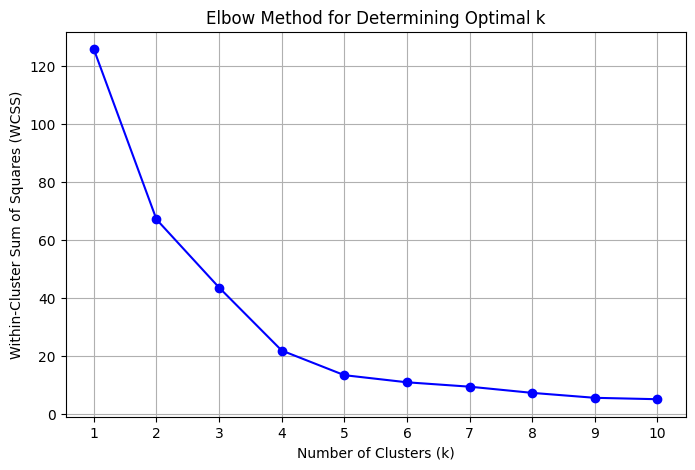

Converged after 3 iterations.

Final centroids with k = 4:
Centroid 1: [5.48 2.82]
Centroid 2: [6.91666667 0.13333333]
Centroid 3: [ 4.4        -0.28571429]
Centroid 4: [1.75 3.25]


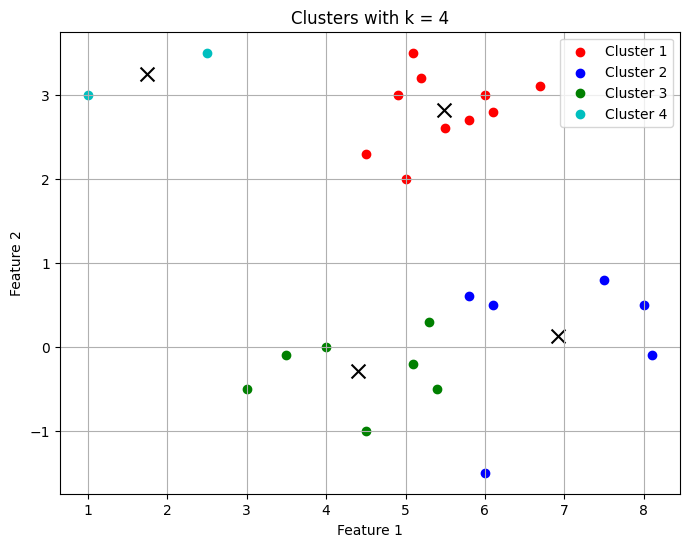

In [4]:
# Compute WCSS for different values of k
def compute_wcss(X, k_values):
    wcss = []
    k_index = 0
    while k_index < len(k_values):
        k = k_values[k_index]
        wcss_runs = []
        run_count = 0
        while run_count < 5:  # Run multiple times for stability
            # Random initialization
            centroids = [X[idx].copy() for idx in np.random.choice(len(X), size=k, replace=False)]
            # Run K-Means
            final_centroids, final_clusters = helper(X, centroids)
            
            cluster_index = 0
            total_wcss = 0
            # Compute WCSS
            while cluster_index < k:
                cluster_points = final_clusters[cluster_index]
                if cluster_points.size > 0:
                    total_wcss += np.sum(np.linalg.norm(cluster_points - final_centroids[cluster_index], axis=1) ** 2)
                cluster_index += 1
            wcss_runs.append(total_wcss)
            run_count += 1
        wcss.append(min(wcss_runs))
        k_index += 1
    return wcss

k_values = range(1, 11)
wcss = compute_wcss(X, k_values)

# Plot WCSS vs. number of clusters
plt.figure(figsize=(8, 5))
plt.plot(k_values, wcss, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.title('Elbow Method for Determining Optimal k')
plt.xticks(k_values)
plt.grid(True)
plt.show()

# Let's assume the elbow point is at k = 4
optimal_k = 4

# Random initialization of centroids for optimal k
np.random.seed(43)  # For reproducibility
optimal_centroids = [X[idx].copy() for idx in np.random.choice(len(X), size=optimal_k, replace=False)]

# Run K-Means clustering with optimal k
final_centroids_optimal, final_clusters_optimal = helper(X, optimal_centroids)

# Output the final centroids
print(f"\nFinal centroids with k = {optimal_k}:\n" + "\n".join(f"Centroid {i+1}: {centroid}" for i, centroid in enumerate(final_centroids_optimal)))

# Plot the final clusters with optimal k
plt.figure(figsize=(8, 6))
colors = ['r', 'b', 'g', 'c', 'm', 'y', 'k']
i = 0
while i < optimal_k:
    cluster = final_clusters_optimal[i]
    if cluster.size > 0:
        plt.scatter(cluster[:, 0], cluster[:, 1], c=colors[i % len(colors)], label=f'Cluster {i+1}')
    i += 1

# Plot centroids
i = 0
while i < len(final_centroids_optimal):
    centroid = final_centroids_optimal[i]
    plt.scatter(centroid[0], centroid[1], c='k', marker='x', s=100)
    i += 1

plt.title(f'Clusters with k = {optimal_k}')
plt.ylabel('Feature 2')
plt.xlabel('Feature 1')
plt.legend()
plt.grid(True)
plt.show()